In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


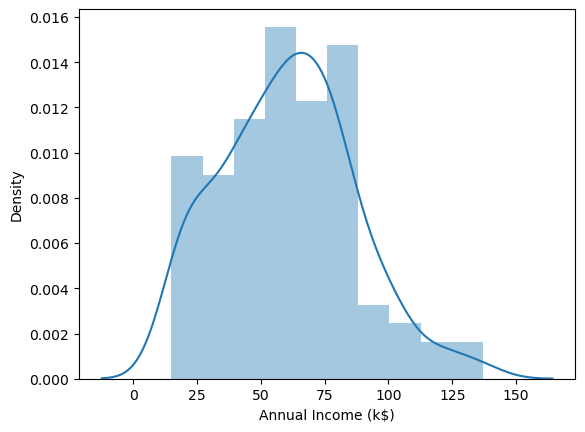

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

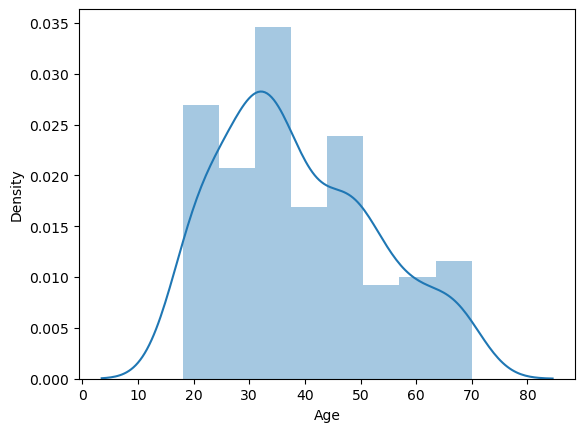

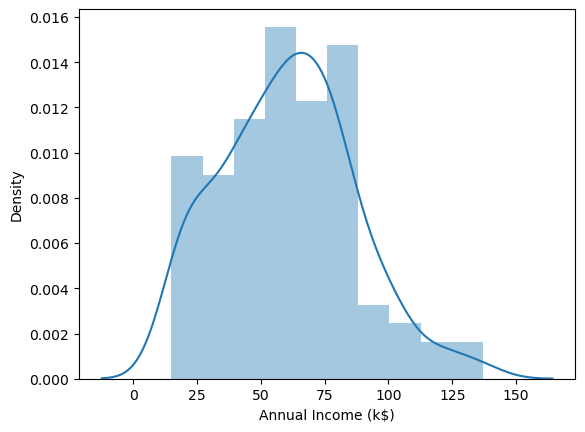

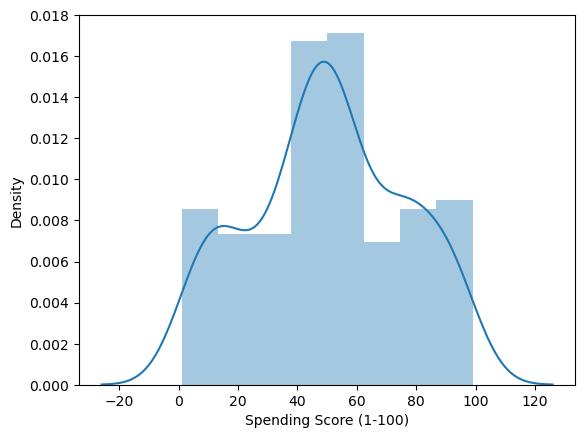

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

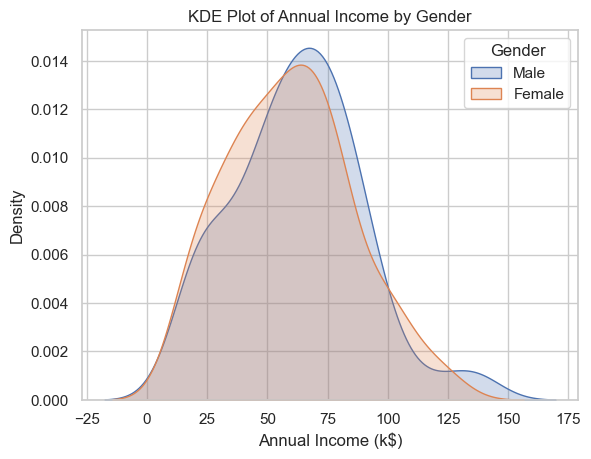

In [8]:
# Set the plot style
sns.set(style="whitegrid")

# Create a KDE plot for each gender
for gender in df['Gender'].unique():
    sns.kdeplot(df[df['Gender'] == gender]['Annual Income (k$)'], 
                fill=True, 
                label=gender)  # Use fill=True to shade the area under the curve

# Customize the plot
plt.title('KDE Plot of Annual Income by Gender')  # Adding a title for clarity
plt.xlabel('Annual Income (k$)')  # Label for x-axis
plt.ylabel('Density')  # Label for y-axis
plt.legend(title='Gender')  # Show legend
plt.show()  # Show the plot

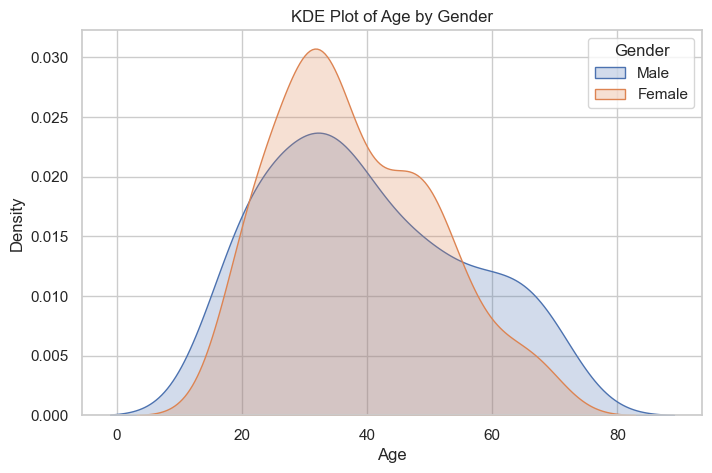

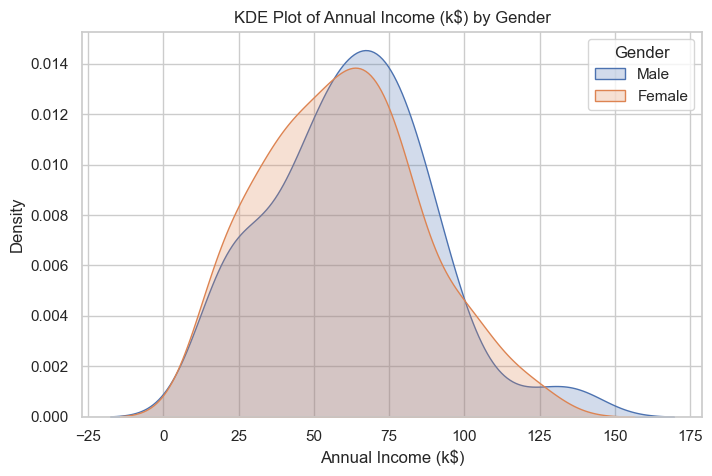

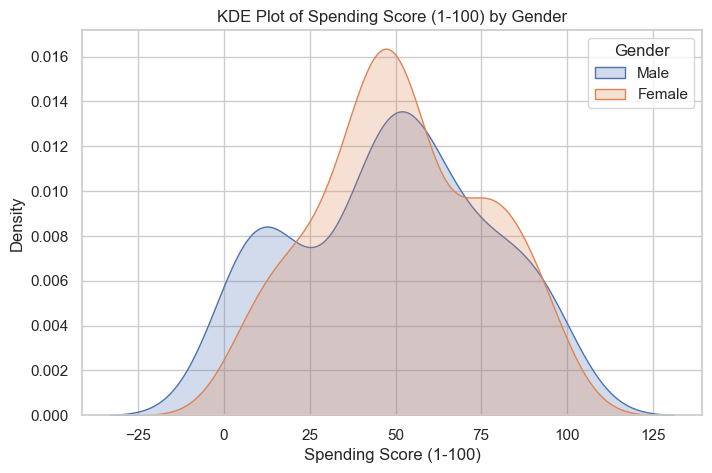

In [10]:
# Set the plot style
sns.set(style="whitegrid")

# List of columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create KDE plots for each specified column
for i in columns:
    plt.figure(figsize=(8, 5))  # Set figure size for better readability
    for gender in df['Gender'].unique():
        sns.kdeplot(df[df['Gender'] == gender][i], 
                    fill=True, 
                    label=gender)  # Fill the area under the curve and label by gender
    
    # Customize the plot
    plt.title(f'KDE Plot of {i} by Gender')  # Adding a title for clarity
    plt.xlabel(i)  # Label for x-axis
    plt.ylabel('Density')  # Label for y-axis
    plt.legend(title='Gender')  # Show legend
    plt.show()  # Show the plot

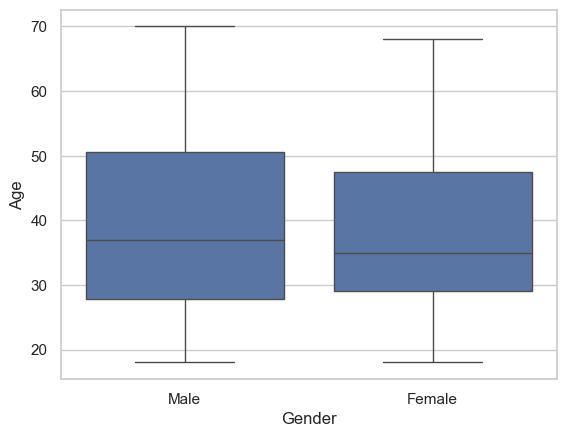

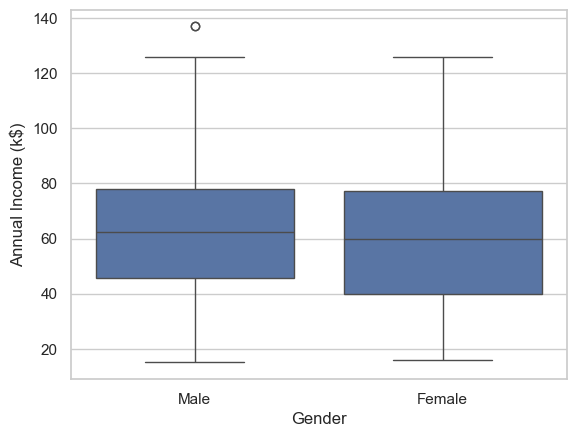

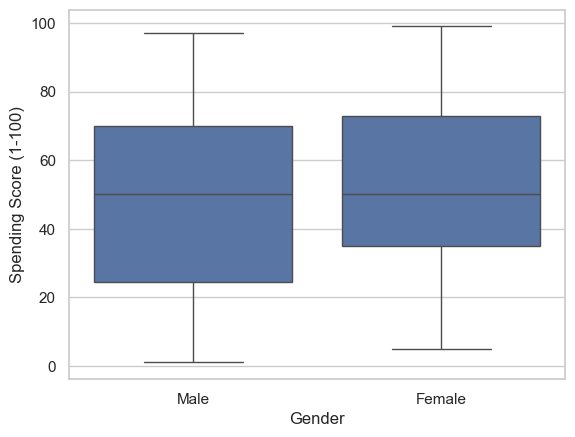

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

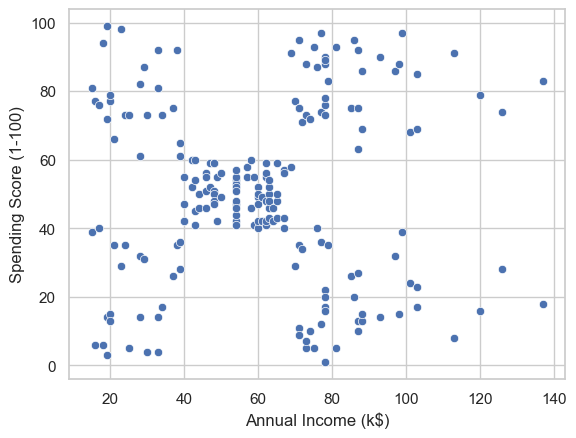

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

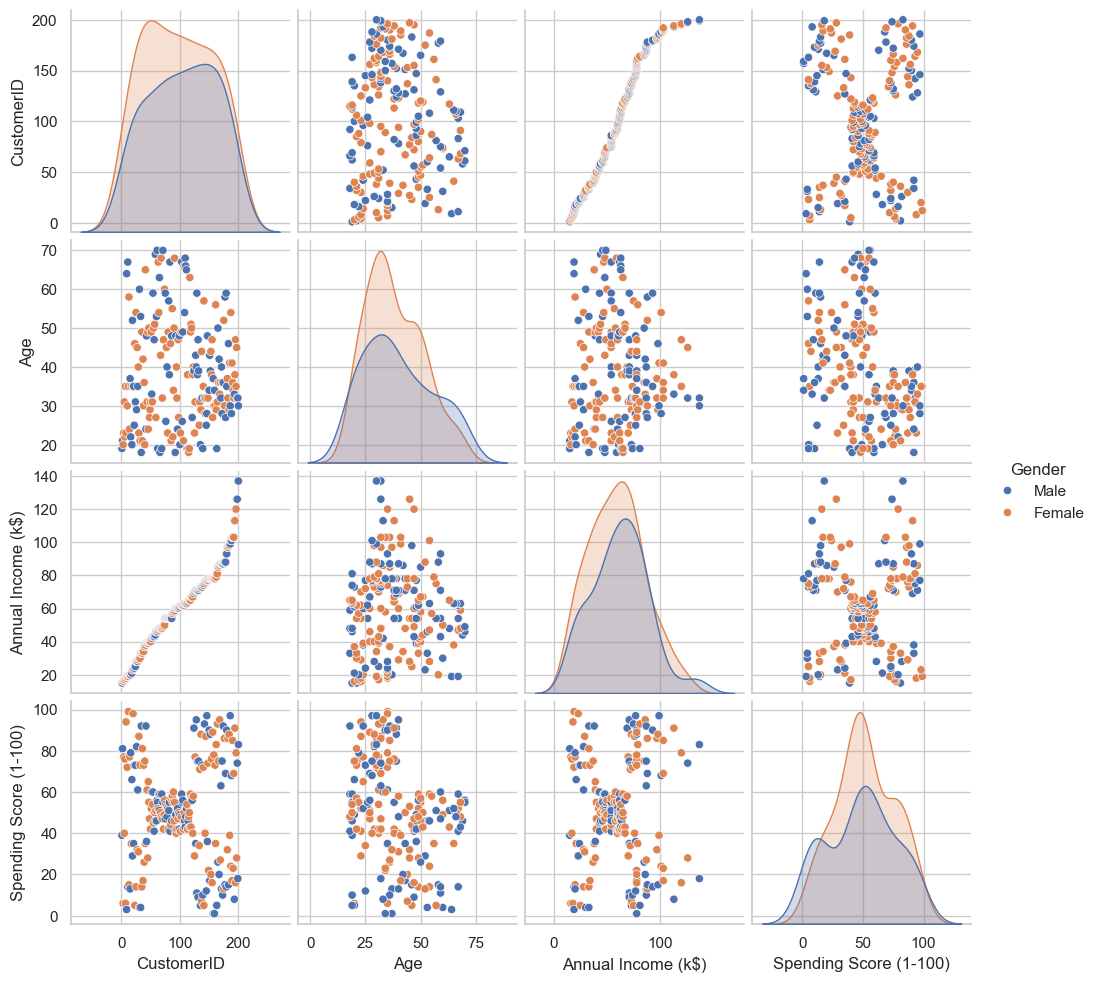

In [14]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [16]:
# Group by 'Gender' and calculate the mean for the specified columns
mean_values = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
# Calculate correlation only on numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()  # Select only numeric columns

# Display the correlation matrix
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [21]:
# Convert categorical variable 'Gender' into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # drop_first=True to avoid dummy variable trap

# Calculate correlation including the encoded columns
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Gender_Male               0.057400  0.060867            0.056410   

                        Spending Score (1-100)  Gender_Male  
CustomerID                            0.013835     0.057400  
Age                                  -0.327227     0.060867  
Annual Income (k$)                    0.009903     0.056410  
Spending Score (1-100)                1.000000    -0.058109  
Gender_Male                          -0.058109     1.000000  


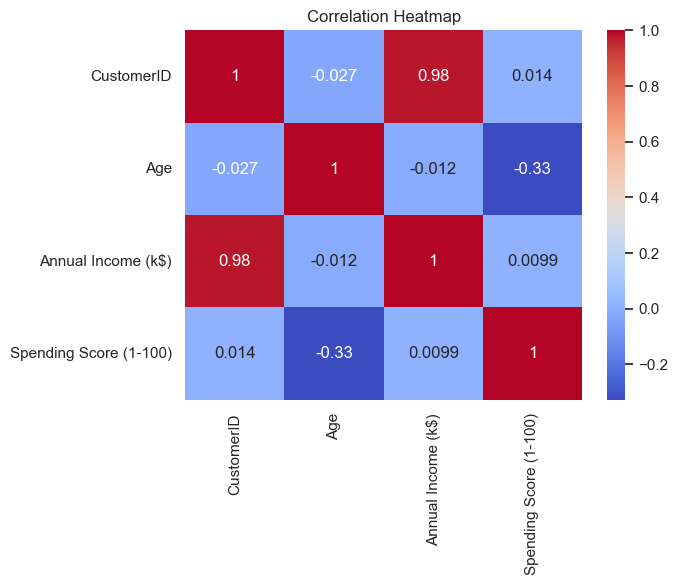

In [23]:
# Select only numeric columns for correlation
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.title('Correlation Heatmap')  # Optional: Add a title
plt.show()  # Show the heatmap

# Clustering - Univariate, Bivariate, Multivariate

In [24]:
clustering1 = KMeans(n_clusters=3)

In [25]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [26]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [28]:
df['Income Cluster'].value_counts()

Income Cluster
0    82
1    62
2    56
Name: count, dtype: int64

In [29]:
clustering1.inertia_

25720.591210520408

In [30]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [31]:
intertia_scores

[137277.28000000003,
 49761.73701298701,
 23528.152173913055,
 13278.112713472487,
 8667.679614837509,
 5081.484660267269,
 4247.342307692307,
 3993.2391919191928,
 2368.8513814616754,
 1854.657496012759]

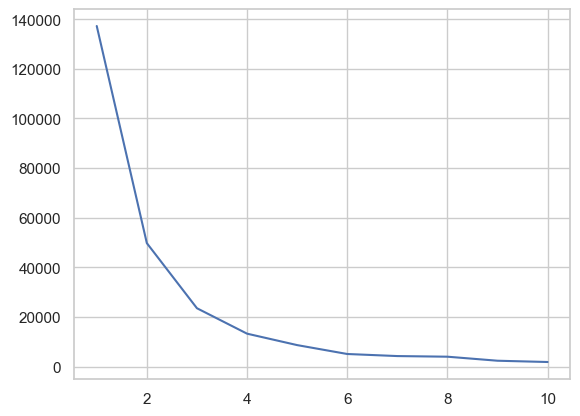

In [32]:
plt.plot(range(1,11),intertia_scores)

In [33]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [35]:
# Group by 'Income Cluster' and calculate the mean for the specified columns
mean_values = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               41.231707           61.634146               50.256098
1               37.451613           30.612903               49.838710
2               36.910714           92.142857               50.517857


In [36]:
# Group by 'Income Cluster' and calculate the mean for the specified columns
mean_values = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               41.231707           61.634146               50.256098
1               37.451613           30.612903               49.838710
2               36.910714           92.142857               50.517857


In [37]:
#Bivariate Clustering

In [38]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,1


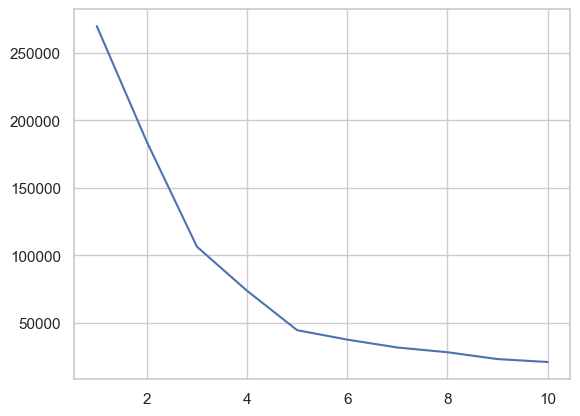

In [39]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [40]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

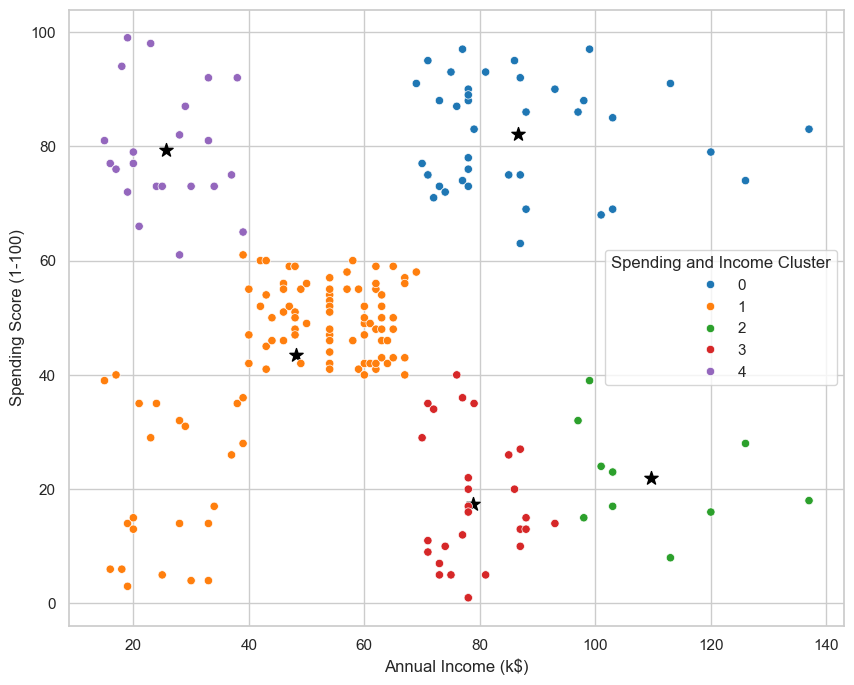

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [42]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.594059,0.405941
2,0.700000,0.300000
3,0.392857,0.607143
4,0.590909,0.409091


In [44]:
# Group by 'Spending and Income Cluster' and calculate the mean for the specified columns
mean_values = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            32.692308           86.538462   
1                            43.603960           48.168317   
2                            41.000000          109.700000   
3                            40.178571           78.892857   
4                            25.272727           25.727273   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         82.128205  
1                                         43.396040  
2                                         22.000000  
3                                         17.428571  
4                                         79.363636  


In [45]:
# Group by 'Spending and Income Cluster' and calculate the mean for the specified columns
mean_values = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the mean values
print(mean_values)

                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            32.692308           86.538462   
1                            43.603960           48.168317   
2                            41.000000          109.700000   
3                            40.178571           78.892857   
4                            25.272727           25.727273   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         82.128205  
1                                         43.396040  
2                                         22.000000  
3                                         17.428571  
4                                         79.363636  


In [46]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [47]:
scale = StandardScaler()

In [48]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,1


In [49]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,1,True
1,2,21,15,81,1,4,True
2,3,20,16,6,1,1,False
3,4,23,16,77,1,4,False
4,5,31,17,40,1,1,False


In [50]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [51]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [52]:
dff = scale.fit_transform(dff)

In [53]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


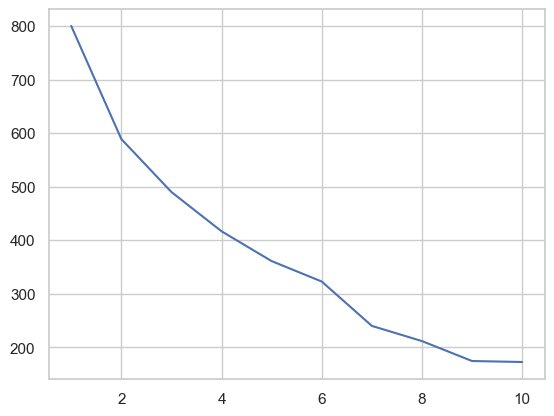

In [54]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,2,2
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,2,2


In [56]:
df.to_csv('Clustering.csv')

### Conclusion

The **Customer Segmentation Project** utilized data-driven methodologies to analyze customer behavior and preferences, leading to the identification of distinct segments based on age, annual income, and spending score. By employing the **K-Means clustering algorithm**, the project successfully grouped customers into meaningful categories: **Low**, **Medium**, and **High** spenders.

This segmentation enables targeted marketing strategies and personalized communication, which can significantly enhance customer engagement and improve overall business performance. The insights gained from this analysis, along with the exploratory data analysis performed, are pivotal for strategic decision-making, helping businesses tailor their products and services to meet the unique needs of different customer segments.


In [58]:
df.to_csv('C:/Users/asmip/OneDrive/Desktop/Sanket/Python/Project/ML/Customer Segmentation/Clustering.csv', index=False)
